In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Preparing functions

In [2]:
def raytracing(n0, x0, y0, theta0, ds, L):
    theta = np.deg2rad(theta0)
    n = n0/np.cosh(np.pi*np.abs(y0)/2/L)
    x_tmp = x0
    y_tmp = y0
    tray = np.array([[x_tmp,y_tmp]])
    while x_tmp < L:
        y_next = y_tmp + ds*np.sin(theta)
        x_next = x_tmp + ds*np.cos(theta)
        tray = np.append(tray, [[x_next, y_next]], axis=0)
        n_next = n0/np.cosh(np.pi*np.abs(y_next)/2/L)
        if np.sin(np.pi/2 - np.abs(theta))*n/n_next >= 1:
            theta = -theta
        else:
            if theta > 0:
                theta = np.pi/2 - np.arcsin(np.sin(np.pi/2 - np.abs(theta))*n/n_next)
            else:
                theta = np.arcsin(np.sin(np.pi/2 - np.abs(theta))*n/n_next) - np.pi/2
        y_tmp = y_next
        x_tmp = x_next
        n = n_next
    return tray, theta, y_tmp

In [3]:
def plotRayTracing(n0, x0, y0, ds, L, R, index_matrix, angles = range(-50 + 1,50 + 1, 5)):
    theta_out = np.zeros(len(angles))
    y_out = np.zeros(len(angles))
    for i, angle in enumerate(angles):
        tray, theta_out[i], y_out[i] = raytracing(n0, x0, y0, angle, ds, L)
        plt.plot(tray[:,0],tray[:,1],'r')

    plt.pcolormesh(x,y,index_matrix,shading='auto',cmap='Greys')
    plt.colorbar()
    plt.title("Ray Tracing")
    plt.xlim([0,L])
    plt.ylim([-R,R])
    plt.ylabel("[m]")
    plt.xlabel("[m]")
    plt.grid()
    #plt.show()
    
    #plt.plot(y_out, np.rad2deg(theta_out))
    #plt.title("Theta at the output of the lens")
    #plt.show()
    return theta_out, y_out

## Initiating parameter

In [4]:
# lenght of lens
L = 0.125
R = 0.1
# index max
n0 = 7.5
# angle of source ray
theta0 = np.deg2rad(30)

The refractive index profile

In [5]:
dx, dy = 0.25e-3, 0.25e-3
x = np.linspace(0, L, int(L/dx) + 1)
y = np.linspace(-R, R, int(2*R/dy) + 1)
X,Y = np.meshgrid(x,y)

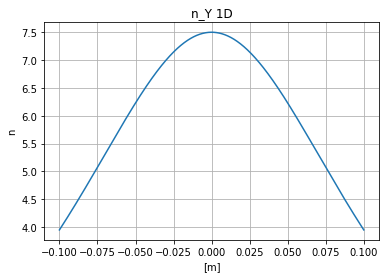

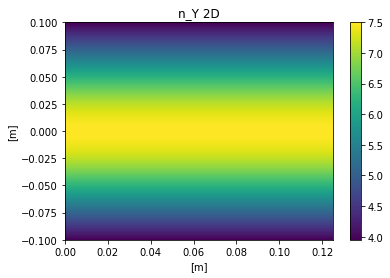

In [6]:
n_y = n0/np.cosh(np.pi*np.abs(y)/2/L)
X,n_Y = np.meshgrid(x,n_y)

plt.plot(y,n_y)
plt.title("Refractive index distribution of the lens")
plt.ylabel("n")
plt.xlabel("[m]")
plt.title("n_Y 1D")
plt.grid()
plt.show()
plt.pcolormesh(x,y,n_Y,shading='auto')
plt.colorbar()
plt.title("n_Y 2D")
plt.ylabel("[m]")
plt.xlabel("[m]")
plt.show()

## Plot rays

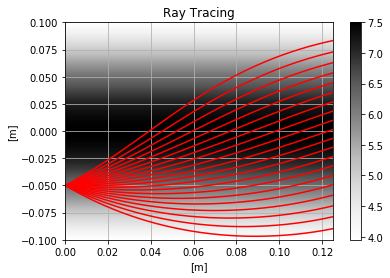

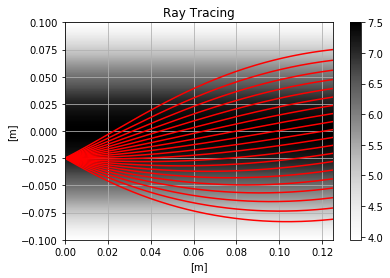

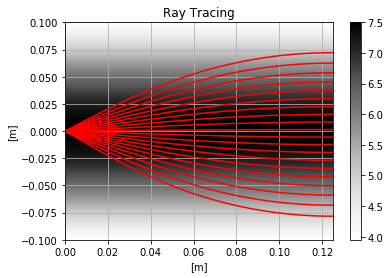

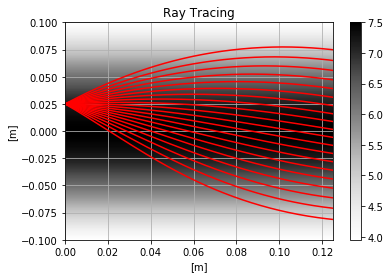

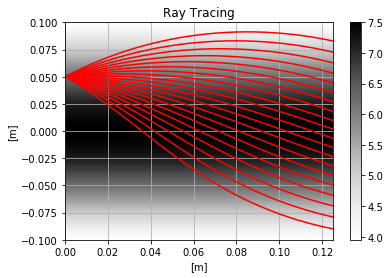

In [7]:
theta_m2, y_m2 = plotRayTracing(n0, 0, -0.05, dy, L, R, n_Y)
plt.show()
theta_m1, y_m1 = plotRayTracing(n0, 0, -0.025, dy, L, R, n_Y)
plt.show()
theta_0, y_0 = plotRayTracing(n0, 0, 0, dy, L, R, n_Y)
plt.show()
theta_1, y_1 = plotRayTracing(n0, 0, 0.025, dy, L, R, n_Y)
plt.show()
theta_2, y_2 = plotRayTracing(n0, 0, 0.05, dy, L, R, n_Y)
plt.show()

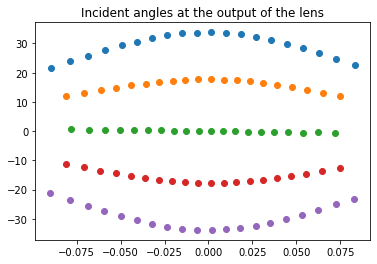

In [8]:
plt.plot(y_m2, np.rad2deg(theta_m2),"o")
plt.plot(y_m1, np.rad2deg(theta_m1),"o")
plt.plot(y_0, np.rad2deg(theta_0),"o")
plt.plot(y_1, np.rad2deg(theta_1),"o")
plt.plot(y_2, np.rad2deg(theta_2),"o")

plt.title("Incident angles at the output of the lens")
plt.show()

## Intergrating the source pattern

In [9]:
delta_theta = 2 #deg

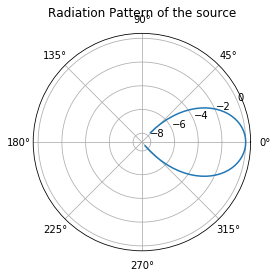

In [10]:
theta_array = np.array([i for i in range(-50, 50, delta_theta)]) + 0.01
A_k_s = 10**(-3*(theta_array/30)**2/20) # supposing the source has a 10° HPBW
plt.polar(np.deg2rad(theta_array), 20*np.log10(A_k_s))
plt.title("Radiation Pattern of the source")
plt.show()

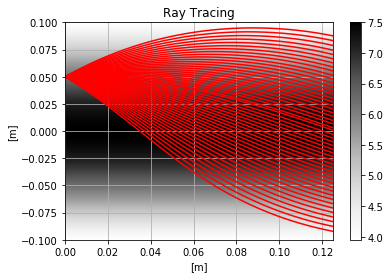

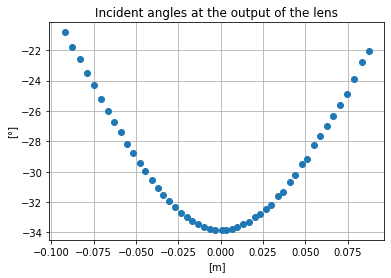

In [11]:
pattern_scale = 0.2
theta_out, y_out = plotRayTracing(n0, 0, 0.05, dy, L, R, n_Y, theta_array)
pattern_norm_min = (20*np.log10(A_k_s)-min(20*np.log10(A_k_s)))*pattern_scale
plt.plot(np.cos(np.deg2rad(theta_array))*pattern_norm_min, np.sin(np.deg2rad(theta_array))*pattern_norm_min + 2, "b")
plt.show()
plt.plot(y_out, np.rad2deg(theta_out),"o")
plt.title("Incident angles at the output of the lens")
plt.ylabel("[°]")
plt.xlabel("[m]")
plt.grid()
plt.show()

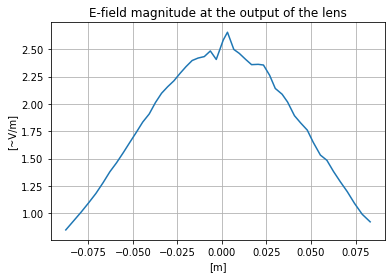

In [12]:
delta_L = y_out[2:] - y_out[:-2]
A_k = A_k_s[1:-1]*np.sqrt(np.deg2rad(delta_theta)/(delta_L*np.cos(theta_out[1:-1])))
plt.plot(y_out[1:-1], A_k)
plt.title("E-field magnitude at the output of the lens")
plt.ylabel("[~V/m]")
plt.xlabel("[m]")
plt.grid()
plt.show()